In [1]:
from pykrx import stock
from datetime import datetime
from util.util import *
from tqdm.notebook import tqdm 


tickers = stock.get_market_ticker_list("20230928", market="KOSPI")
names = [stock.get_market_ticker_name(ticker) for ticker in tickers]


print(len(tickers))



951


20일
60일 
100일 
150일
200일 해보자 !

먼저 100일로 Data를 정리해보자. 

In [12]:
today = datetime.today().strftime('%Y%m%d')

start_date = "20230601"
end_date = "20231231"
ticker = tickers[0]

count_t = 0 
count_f = 0 
##################   GET DATA   ##################
for ticker in tqdm(tickers) :
    try :  
        df = stock.get_market_ohlcv(start_date, end_date, ticker)
        df = rename_columns(df)
        df_close = df['Close']
        hello = is_stationary(df_close, significance_level=0.2)
        
        if hello == True : 
            count_t += 1
        else : 
            count_f += 1
        
        print(f'T : {count_t} , F : {count_f}')
    
    except : 
        pass




# df = rename_columns(df)
# df = add_all_feature(df)
# df_fdm = stock.get_market_fundamental(start_date, end_date, ticker, freq="d")
# df_tra_vol_all = stock.get_market_trading_volume_by_date(start_date, end_date, ticker,on='순매수')
# df_tra_vol_all = rename_to_english(df_tra_vol_all)
# merged_df_1 = df.merge(df_fdm, left_index=True, right_index=True, how='outer')
# merged_df_2 = merged_df_1.merge(df_tra_vol_all, left_index=True, right_index=True, how='outer')
# df = merged_df_2


#################   Normalize Data   #################
# normalized_data = normalize_data(df.copy())
# print(df.tail(5))
# print(df[df.index.year == 2018])
# df_copy = df.tail(100)
# df_copy_norm = normalize_data(df_copy)
# df_copy_norm_2 = new_normalize(df_copy)
# print(df_copy_norm_2)
# print(normalized_data[-100:])
# dates = df.index
# print(dates)
# features1 = ['Open', 'High', 'Low', 'Close', 'VWAP', 'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'EMA_12', 'EMA_26', 'WMA_20', 'Middle_Band_20', 'Upper_Band_20', 'Lower_Band_20']
# features2 = ['Volume', 'OBV', 'VROC', 'Rate of Change', 'ROC_12', 'Momentum_10', 'Historical_Volatility_20', 'RSI', 'MACD', 'Signal_Line', 'CCI', '+DI', '-DI', 'ADX', 'Aroon_Oscillator', 'BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS', 'Institutional', 'Other Corporations', 'Individual', 'Foreigners']
# print(df_copy[features2])

# df_copy_norm_2 = new_normalize(df_copy)
# print(df_copy_norm_2[features])
# print(df['Foreigners'].tail(20))
# print(df_copy['Close'])
# hello = is_stationary(df_copy['Close'])
# print(hello)

  0%|          | 0/951 [00:00<?, ?it/s]

T : 0 , F : 1
T : 0 , F : 2
T : 0 , F : 3
T : 0 , F : 4
T : 1 , F : 4
T : 1 , F : 5
T : 1 , F : 6
T : 1 , F : 7
T : 1 , F : 8
T : 1 , F : 9
T : 2 , F : 9
T : 2 , F : 10
T : 2 , F : 11
T : 2 , F : 12
T : 2 , F : 13
T : 2 , F : 14
T : 2 , F : 15
T : 3 , F : 15
T : 3 , F : 16
T : 3 , F : 17
T : 3 , F : 18
T : 3 , F : 19
T : 3 , F : 20
T : 3 , F : 21
T : 3 , F : 22
T : 3 , F : 23
T : 4 , F : 23
T : 4 , F : 24
T : 5 , F : 24
T : 5 , F : 25
T : 5 , F : 26
T : 5 , F : 27
T : 5 , F : 28
T : 5 , F : 29
T : 5 , F : 30
T : 5 , F : 31
T : 5 , F : 32
T : 5 , F : 33
T : 6 , F : 33
T : 6 , F : 34
T : 7 , F : 34
T : 7 , F : 35
T : 7 , F : 36
T : 7 , F : 37
T : 7 , F : 38
T : 7 , F : 39
T : 8 , F : 39
T : 8 , F : 40
T : 8 , F : 41
T : 8 , F : 42
T : 8 , F : 43
T : 8 , F : 44
T : 8 , F : 45
T : 9 , F : 45
T : 9 , F : 46
T : 9 , F : 47
T : 9 , F : 48
T : 9 , F : 49
T : 9 , F : 50
T : 9 , F : 51
T : 9 , F : 52
T : 9 , F : 53
T : 9 , F : 54
T : 9 , F : 55
T : 9 , F : 56
T : 9 , F : 57
T : 9 , F : 58
T : 9 

In [48]:
features_normalize_together_min_max = ['Open', 'High', 'Low', 'Close', 'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'EMA_12', 'EMA_26', 'WMA_20', 'Middle_Band_20', 'Upper_Band_20', 'Lower_Band_20']
features_normalize_self_min_max  = ['VWAP','Volume','Historical_Volatility_20']
features_normalize_self_abs_max= ['Rate of Change','OBV','VROC','ROC_12','Momentum_10','MACD','Signal_Line','BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS','Institutional', 'Other Corporations', 'Individual', 'Foreigners']
features_normalize_100 = ['RSI', '%K', '%D','CCI','+DI', '-DI','ADX','Aroon_Oscillator']


fea = features_normalize_together_min_max + features_normalize_self_min_max + features_normalize_self_abs_max + features_normalize_100

print(len(fea))

42


In [10]:
today = datetime.today().strftime('%Y%m%d')

start_date = "20220501"
end_date = today
tickers = stock.get_market_ticker_list(today, market="KOSPI")

all_data = []

for ticker in tqdm(tickers):


    ##################   GET DATA   ##################
    try : 
        df = stock.get_market_ohlcv(start_date, end_date, ticker)
    except : 
        continue
    if len(df) <= 100 : 
        continue
    df = rename_columns(df)
    df = add_all_feature(df)
    df_fdm = stock.get_market_fundamental(start_date, end_date, ticker, freq="d")
    df_tra_vol_all = stock.get_market_trading_volume_by_date(start_date, end_date, ticker,on='순매수')
    df_tra_vol_all = rename_to_english(df_tra_vol_all)
    merged_df_1 = df.merge(df_fdm, left_index=True, right_index=True, how='outer')
    merged_df_2 = merged_df_1.merge(df_tra_vol_all, left_index=True, right_index=True, how='outer')
    df = merged_df_2
    
    # Replace infinite values with NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    # Fill NaN values using forward fill and then backward fill
    df.ffill(inplace=True)
    df.bfill(inplace=True)

    if len(df.columns) != 42 : 
        continue
    

    
    #################   Normalize Data   #################
    normalized_data = normalize_data(df.copy())
    normalized_data_100 = normalized_data[-100:]
    
    np_normalized_data_100 = np.array(normalized_data_100)
    all_data.append(np_normalized_data_100)

all_data = np.array(all_data)

print(all_data.shape)




  0%|          | 0/951 [00:00<?, ?it/s]

c:\Users\pari0\anaconda3\envs\RL\lib\site-packages\sklearn\utils\extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\pari0\anaconda3\envs\RL\lib\site-packages\sklearn\utils\extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\pari0\anaconda3\envs\RL\lib\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\pari0\anaconda3\envs\RL\lib\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
c:\Users\pari0\anaconda3\envs\RL\lib\site-packages\sklearn\preprocessing\_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
c:\Users\pari0\anaconda3\envs\RL\lib\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN sli

(904, 100, 42)


In [22]:
for year in range(2017,2023):
    print(type(year))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


In [28]:
import pickle

with open('./data/KOSPI/KOSPI_2018.pkl', 'rb') as f:
    KOSPI_2018 = pickle.load(f)

In [30]:
import numpy as np


data = KOSPI_2018['data']
valid_ticker = KOSPI_2018['valid_ticker']
dimension = KOSPI_2018['dimension']
features = KOSPI_2018['features']
dates = KOSPI_2018['dates']

print(data.shape)
data_temp = data[:20]
print(data_temp.shape)

(844, 244, 42)
(20, 244, 42)


In [32]:
import numpy as np

# Example list of arrays
data_list = [np.random.rand(844, 20, 42) for _ in range(3)]

# Concatenate along the first axis
combined_data = np.concatenate(data_list, axis=0)

# Check the shape
print(combined_data.shape)  # Should print (844*3, 20, 42)


(2532, 20, 42)


In [2]:
9 // 2

4

In [1]:
9 % 2

1

In [5]:
import numpy as np

a = np.array([1, 0, 1, 1,0])
b = np.array([1, 0, 1, 0,1])

indices = np.where(a != b)
print(indices)


(array([3, 4], dtype=int64),)


In [11]:
import torch

# Create a 2x3 tensor filled with ones
ones_tensor = torch.ones(2, 3)
print(ones_tensor)


tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [1]:
hello = [1,3,4,5]


print(hello[-2:])

[4, 5]


In [7]:
from pykrx import stock
from datetime import datetime
from util import *
from tqdm.notebook import tqdm 
import pickle
import numpy as np
from datetime import datetime

sign = ['024940', '184230', '063440', '289080', '246690', '348150', '267320', '042420', '077360', '088910', '094170', '013120', '131970', '060570', '110990', '092070', '263020', '200350', '171010', '067730', '302550', '146320', '141000', '138580', '143240', '357780', '013810', '002800', '359090', '101240', '036010', '136410', '131370', '102120', '042110', '031330', '351320', '187660', '383310', '347890', '053280', '244460', '067900', '330350', '136540', '191410', '303530', '264850', '115610', '067010', '091120', '254120', '065060', '278280', '115500', '089150', '053080', '054780', '124560', '066700', '038950', '068050', '189690', '234100', '137400', '062970', '106080']
today = datetime.today().strftime('%Y%m%d')
rate = []
for s in sign : 
    df = stock.get_market_ohlcv(today, today, s)
    
    rate.append(df['등락률'])


nomi =  ((np.array(rate)/100) > 0.05).sum()
deno = len(rate)

rate_np = np.array(rate).sum()/len(rate)

print(rate_np)

print(nomi,deno)

2.220412607041505
8 67


In [ ]:
X_train_tensor = torch.tensor(train_x, dtype=torch.float32)
X_train_tensor_reshaped = X_train_tensor.view(len(data),data.shape[1]-window,train_x.shape[1],features_dim)

In [8]:
import torch 

tensor_rand = torch.rand(30,20,42)
tensor_rand_view = tensor_rand.view(3,10,20,42)
print(tensor_rand)
print(tensor_rand_view)

tensor([[[0.9410, 0.1475, 0.0279,  ..., 0.8424, 0.7511, 0.1016],
         [0.4847, 0.2942, 0.1596,  ..., 0.6113, 0.7843, 0.4524],
         [0.0055, 0.5850, 0.1785,  ..., 0.1671, 0.0448, 0.5254],
         ...,
         [0.9949, 0.8638, 0.5860,  ..., 0.5775, 0.3597, 0.2914],
         [0.7356, 0.7734, 0.4389,  ..., 0.0067, 0.1117, 0.9875],
         [0.6194, 0.2872, 0.7769,  ..., 0.9952, 0.2528, 0.5970]],

        [[0.9249, 0.9684, 0.0138,  ..., 0.3475, 0.8989, 0.7769],
         [0.1470, 0.9676, 0.6913,  ..., 0.2463, 0.3607, 0.3165],
         [0.3180, 0.9854, 0.2734,  ..., 0.5101, 0.2619, 0.8589],
         ...,
         [0.7082, 0.8929, 0.2634,  ..., 0.6706, 0.7303, 0.4464],
         [0.3214, 0.8319, 0.3360,  ..., 0.7925, 0.5494, 0.8191],
         [0.1627, 0.1139, 0.2095,  ..., 0.5832, 0.6856, 0.0972]],

        [[0.3976, 0.1061, 0.1555,  ..., 0.6056, 0.8180, 0.9520],
         [0.6487, 0.6728, 0.0090,  ..., 0.4787, 0.9532, 0.6573],
         [0.6500, 0.1008, 0.1407,  ..., 0.9927, 0.8368, 0.

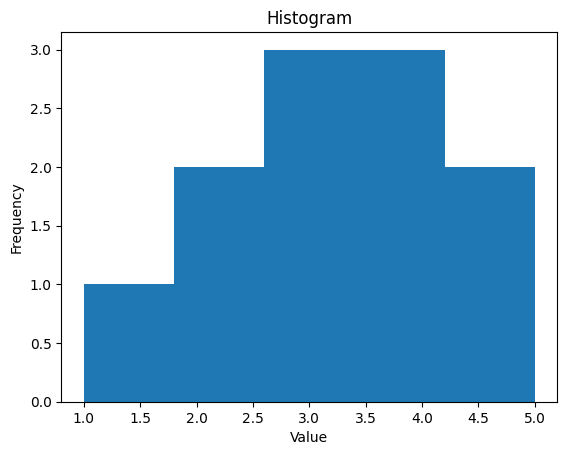

In [7]:
import matplotlib.pyplot as plt

data = [1, 2, 2.1, 3.5,3.6,3.3, 3, 3, 4, 5, 5]

plt.hist(data, bins=5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()


In [4]:
data = [1, 2, 3, 4,5,6,7, 8, 9, 10, 11]


print(data[4:6])
print(data[4])
print(data[6])

[5, 6]
5
7


In [5]:
import numpy as np
data = np.array([[1, 2,5],[3,4,7]])

print(data)

print(np.max(data,axis=1))

[[1 2 5]
 [3 4 7]]
[5 7]
